#Open Source Lineage

Analysis of the status and progression of funded open source projects.

In [2]:
import pandas as pd

In [3]:
# Data set stored in GitHub: Import into a Pandas data frame
csv_file = "https://github.com/jmstanto/oslineage/raw/main/NSFopenSourceAwards.csv"

award_data = pd.read_csv(csv_file, encoding = "ISO-8859-1")

In [4]:
award_data.columns # Show the list of variables in the file

Index(['AwardNumber', 'Title', 'NSFOrganization', 'Program(s)', 'StartDate',
       'LastAmendmentDate', 'PrincipalInvestigator', 'State', 'Organization',
       'AwardInstrument', 'ProgramManager', 'EndDate', 'AwardedAmountToDate',
       'Co-PIName(s)', 'PIEmailAddress', 'OrganizationStreet',
       'OrganizationCity', 'OrganizationState', 'OrganizationZip',
       'OrganizationPhone', 'NSFDirectorate', 'ProgramElementCode(s)',
       'ProgramReferenceCode(s)', 'ARRAAmount', 'Abstract'],
      dtype='object')

In [5]:
# For descriptive purposes, examine a distribution of awards across states
state_groups = award_data.groupby('OrganizationState').agg('count')

state_groups

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,PIEmailAddress,OrganizationStreet,OrganizationCity,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract
OrganizationState,,,,,,,,,,,,,,,,,,,,,
AK,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
AL,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,31,32,32
AR,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
AZ,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,44,52,52
CA,290,290,290,290,290,290,290,290,290,290,...,289,289,290,290,289,290,290,246,290,290
CO,71,71,71,71,71,71,71,71,71,71,...,69,69,71,71,69,71,71,57,71,71
CT,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,24,29,29
DC,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,18,23,23
DE,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,6,7,7


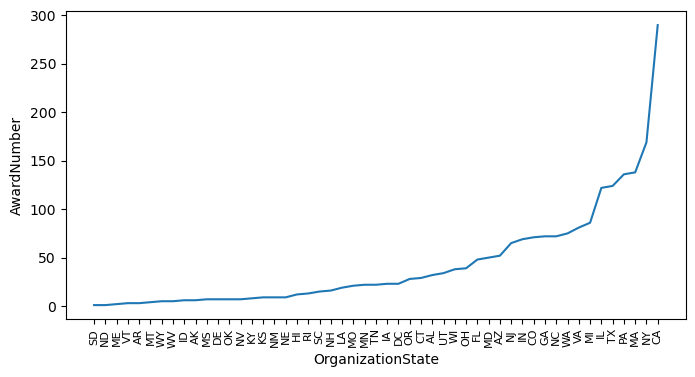

In [6]:
# Now display as a graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))

sorted_df = state_groups.sort_values('AwardNumber')

#display that sorted df as a line plot
sns.lineplot(x="OrganizationState", y="AwardNumber", sort=False, data=sorted_df)

plt.xticks(rotation=90, fontsize=8)

plt.show()

In [57]:
# Task 1: Convert 'AwardedAmountToDate' to integer and store in a new variable
amount_list = []
awarded_amount = award_data['AwardedAmountToDate']
for index, value in awarded_amount.items():
    amount_list.append(int(value[1:-3].replace(',','')))
award_data['AATD'] = amount_list

array([[<Axes: title={'center': 'AATD'}>]], dtype=object)

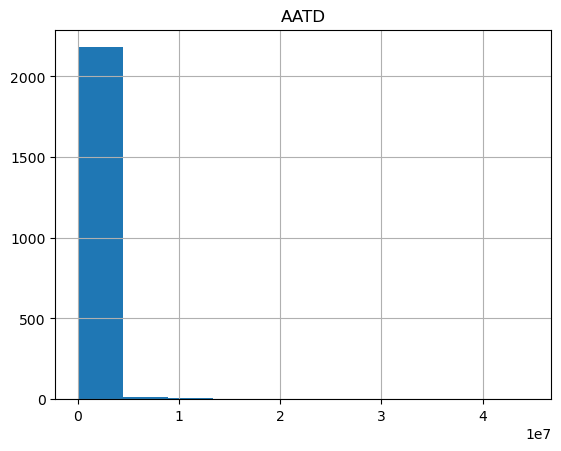

In [39]:
# Task 2: Create a histogram of the integer variable of award amount
award_data.hist(column='AATD')

In [49]:
# Task 3: Convert 'StartDate', 'LastAmendmentDate', and 'EndDate' to
# proper time-date variables
award_data['StartDate'] = pd.to_datetime(award_data['StartDate'])
award_data['LastAmendmentDate'] = pd.to_datetime(award_data['LastAmendmentDate'])
award_data['EndDate'] = pd.to_datetime(award_data['EndDate'])

0      2023-09-20
1      2023-04-27
2      2021-05-21
3      2023-07-18
4      2023-08-30
          ...    
2200   2023-07-26
2201   2023-11-27
2202   2023-08-15
2203   2023-07-25
2204   2023-07-18
Name: LastAmendmentDate, Length: 2205, dtype: datetime64[ns]


array([[<Axes: title={'center': 'StartDate'}>]], dtype=object)

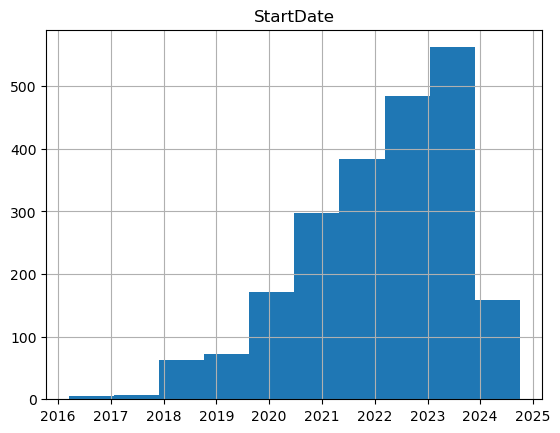

In [50]:
# Task 4: Create a histogram of start dates
award_data.hist(column='StartDate')

In [64]:
# Task 5: Extract a new data frame with just PrincipalInvestigator
# and Co-PIName(s); keep AwardNumber as a unique index


['David Mobley', 'Marco Gerosa', 'Daniel Katz', nan, 'Shiladitya Chaudhury, Robin Lasey', 'Michael Horn', 'James Herbsleb, Bogdan Vasilescu', 'Wenwen Li, Changhyun Kwon, Andre Carrel, Lisa Zorn', 'Tyson Swetnam', 'Robert Beezer, Bradley Miller', 'Daniel Fremont, Necmiye Ozay, Parasara Duggirala', 'Elliott Rouse', 'Alexxai Kravitz', nan, nan, nan, 'Ellen Rathje, Joseph Stubbs', 'Krste Asanovic, Borivoje Nikolic', nan, 'Julien Emile-Geay', 'Myra Cohen, Yong Guan, Daji Qiao, Mohamed Selim, Ahmed Kamal', 'Brett Fiedler, Samel Reid, Katherine Perkins', 'Lilo Pozzo', 'Vani Mandava, Andrew Connolly, Nicoleta Cristea', 'Zsuzsanna Fagyal, Najim Dehak, Piotr Zelasko, Laureano Moro-Velazquez', nan, 'David Longley', 'Benjamin Reid', 'James Davis', nan, nan, 'Ryan Novitski', 'James Herbsleb', nan, 'Hari Subramoni, Mustafa Abduljabbar', 'David Wild, Paul Macklin', nan, nan, 'Stephanie Lieggi', nan, 'William Zeng', nan, nan, 'Andrew Noymer, Chen Li, Quanquan Gu, Nanyun Peng', 'Eugene Wu, Lydia Chilto

In [ ]:
# Task 6: Parse Co-PIName(s) into individual lists of strings
# by splitting on the comma; trim leading and trailing spaces


In [ ]:
# Task 7: Use nested loop to create pairs of PI-coPI names.
# Store in a new data frame

In [ ]:
# Task 8: Use the name pairs to create and display a network diagram

In [ ]:
# Task 9: Copy the award data into a new DF, keeping only the
# AwardNumber, Title, and Abstract. Use spaCy to create doc
# objects from each title. Store the doc objects on the DF

In [ ]:
# Task 10: Review examples of the tokens generated
# by spaCy for a few of the titles

In [ ]:
# Task 11: Used nested loops to find and display tokens
# from the Title that are designated as entities
# Store the token text for the first entity detected (if any)

In [ ]:
# Task 12: Display the entities and make a note of how many
# titles mention an entity

In [ ]:
# Task 13: Repeat the entity analysis for Abstract, but store the results
# on each row of the DF as a complete list of entities detected

In [ ]:
# Task 14: Use nested loops to expand the list of entities
# in a new DF with one entity per row. Include the award
# number for future reference.

In [ ]:
# Task 15: Create a word cloud of entity texts and use
# group_by to see if there are any entities mentioned
# more than once

In [ ]:
# Task 16: Create an experimental loop that runs just a few examples of the following:
# a - grab the text of an entity name and enclose it in quotes
# b - run a google search of the quoted text
# c - count the number of promising URLs returned
# d - note whether GitHub is among the domain names mentioned
# e - save the GitHub URL if it is in the list

In [ ]:
# Task 17: Using results of the experiment, create a streamlined loop
# that finds and stores GitHub links for as many entities as possible

In [ ]:
# Task 18: Use GitHub API to discover the date of the last update
# of the repository in question, for each project that appears
# to have a repository

In [ ]:
# Task 19: Visualize active versus "expired" and "not found" projects by
# using the last update date

In [ ]:
# Task 20: Use award numbers to link back to the original data
# and create a map of all of the active projects